# Descarga de un soplo


## Modelo 
Este modelo determina el tiempo en que una liberación tipo puff de un gas alcance a la línea de una planta industrial, además de la concentración máxima fuera de ésta.



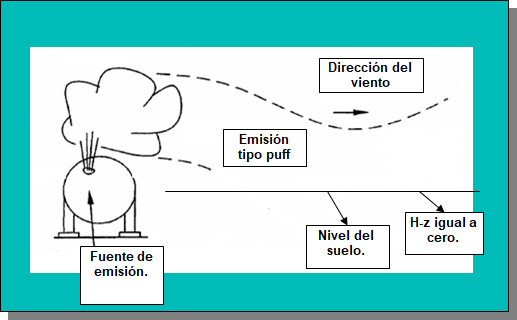

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|M|		Masa total de la descarga		|kg|
|PM|		Peso molecular del gas		|g/mol|
|T|		Temperatura			|K|
|P	|	Presión		|atm|
|H|		Altura de la descarga		|	m|
|x	|	Distancia a favor del viento		|	m|
|y|		Distancia en contra del viento		|	m|
|z|		Distancia por encima del suelo		|	m|
|Vi|		Velocidad del viento			|m/s|
|R|		Constante de los gases		|0.08206	L*atm/mol*K|


## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|s(x,y,z)	|	Coeficientes de dispersión		|m|
|C	|Concentración del gas a favor del viento		|	ppm|
|t|	Tiempo de llegada a la línea industrial|			s|


### Consideraciones
-La liberación es instantánea y a nivel del suelo.

-Para cada clase de estabilidad se ha encontrado una velocidad del viento característica (ver tabla).




## Desarrollo y ecuaciones

El modelo que describe la liberación instantánea de un material gaseoso (tipo puff) es el siguiente:


- Ecuación 1.  ${C}(x,y,z,t)=\frac{G}{\sqrt{2}\pi^{\frac{3}{2}}\sigma_x \sigma_y \sigma_z }exp[\frac{-1}{2}(\frac{y}{\sigma_y})^2]*(exp[\frac{-1}{2}(\frac{z-H}{\sigma_Z})^2]+exp[\frac{-1}{2}(\frac{z+H}{\sigma_Z})^2])$


Determina la concentración del material de manera unificada a "x" distancia favor del viento, "y" distancia en contra del mismo, a "z" distancia de altura del suelo y en un "t" tiempo dado. 

Contando con los parámetros anteriores además de la descarga, podemos deducir fácilmente la concentración con ayuda de los coeficientes de dispersión en las tres direcciones, que representan la desviación estándar de las concentraciones  en las direcciones x,y,z. Dichos coeficientes dependen del tipo de estabilidad (A,B,C,D,E,F) según Pasquill-Gifford, al igual que la distancia a favor del viento y al tipo de emisión en este caso instantánea





|Estabilidades Pasquill-Gifford|$\sigma_y$  ó $\sigma_x$ (m)|$\sigma_z$(m)|
|------|------|------|
	|A|		0.18x0.92|		0.60x0.75|	
	|B|		0.14x0.92	|	0.53x0.73|	
	|C|		0.10x0.92|		0.34x0.71|	
	|D|		0.06x0.92|		0.15x0.70|	
	|E|		0.04x0.92|		0.10x0.65|	
	|F|		0.02x0.92|		0.05x0.61|	




-A:Condiciones extremadamente inestables.

-B:Condiciones moderadamente inestables.

-C:Condiciones ligeramente inestables.

-D:Condiciones neutras.

-E:Condiciones estables.

-F:Condiciones muy estables.


Encontrando dicha concentración, podemos ver que está generalizada para cualquier emisión de gas, es por ello que se puede encontrar la concentración particular del gas en problema con la ecuación siguiente:

- Ecuación 2.  $C_{ppm}=\frac{0.0826 L atm}{gmol K}(\frac{T}{PM})*C(mg/m^3)$

Así es posible especificar la concentración del gas que se está tratando, además de integrar  las condiciones en las que  se desarrolla  el problema de la liberación.
El tiempo de transición se puede calcular por la ecuación típica de posición.


- Ecuación 3.   $t=\frac{x}{u}$

Experimentalmente las velocidades a las que se mueve la nube o soplo, son aquellas desarrolladas por el viento en el tipo de estabilidad dado. A diferencia de los coeficientes anteriores, Pasquill-Gifford encontraron valores promedio (ver tabla en sección de resultados).

### Datos utilizados


- $M=1  kg$
- $PM=30 g/mol$
- $T= 298 K$
- $P= 1  atm$
- $H= 0  m$
- $x=500 m$
- $y=0 m$
- $z=0 m$

In [2]:
R=0.082 #L atm/mol K

In [3]:
    
M=float(input("Masa total de descarga (kg): "))
PM=float(input("Masa molar del gas (g/mol): "))
T=float(input("Temperatura (K): "))
P=float(input("Presión (atm): "))
H=float(input("Altura de la descarga (m): "))
x=float(input("Distancia a favor del viento (m): "))
y=float(input("Distancia en contra del viento (m): "))
z=float(input("Distancia por encima del suelo (m): "))

Masa total de descarga (kg): 1
Masa molar del gas (g/mol): 30
Temperatura (K): 298
Presión (atm): 1
Altura de la descarga (m): 0
Distancia a favor del viento (m): 500
Distancia en contra del viento (m): 0
Distancia por encima del suelo (m): 0


## Resultados


In [4]:
import numpy as np
import math
V=0.1#m/S
PasquillGifford=np.array(["A","B","C","D","E","F"])
Vi=np.array([0.1,0.1,2,3,2,2])

parametro_sigma_xy=np.array([0.18,0.14,0.1,0.06,0.04,0.02])
sigma_xy=parametro_sigma_xy*x**0.92
parametro_sigma_z=np.array([0.6,0.53,0.34,0.15,0.1,0.05])
zElevacion=np.array([0.75,0.73,0.71,0.7,0.65,0.61])
sigma_z=parametro_sigma_z*x**zElevacion

C=(M/(2**0.5*np.pi**(1.5)*sigma_xy*sigma_xy*sigma_z))*np.exp(-0.5*(y/sigma_xy)**2)
C2=np.exp(-0.5*((z-H)/sigma_z)**2)+np.exp(-0.5*((z+H)/sigma_z)**2)
C_ppm=C*C2*10**6*R*T/(P*PM)

t=x/Vi


print('{:^10}''{:^10}''{:^10}''{:^10}''{:^10}''{:^10}''{:^10}'.format('Estabilidad',' V[m/s]','  C[kg/m3] ','  sy o sx[m]','sz[m]','t[s]','C[ppm]'))

for i in range(len(PasquillGifford)):
    
    print('{:^10}''{:^10.1f}''{:^10.12f}''{:^10.3f}''{:^10.3f}''{:^10.0f}''{:^10.4f}'.format(PasquillGifford[i],Vi[i],C[i],sigma_xy[i],sigma_z[i],t[i],C_ppm[i]))

Estabilidad  V[m/s]    C[kg/m3]   sy o sx[m]  sz[m]      t[s]     C[ppm]  
    A        0.1    0.000000667931  54.743    63.442     5000     1.0881  
    B        0.1    0.000001415387  42.578    49.491     5000     2.3058  
    C        2.0    0.000004896748  30.413    28.038     250      7.9771  
    D        3.0    0.000032808217  18.248    11.624     167     53.4468  
    E        2.0    0.000151079278  12.165    5.680      250     246.1182 
    F        2.0    0.001549721602  6.083     2.215      250    2524.5998 
